MINI_PROJECT_1

PART 1

QUESTION 1.1

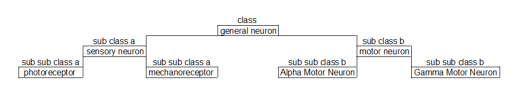

In [4]:
import matplotlib.pyplot as plt
hirarchy_tree = plt.imread('hirarcy tree.png')
plt.imshow(hirarchy_tree)
plt.axis('off')
plt.show()

QUESTION 1.2

In [ ]:

#Defining a main class name "Neuron", costumizing it to have an idle_firing_rate and a throshold for activation
class Neuron:
    def __init__(self, idle_firing_rate=1, threshold=1):
        self.idle_firing_rate = idle_firing_rate
        self.threshold = threshold
        self.actual_firing_rate = 0
# a function to determine weather the neuron fired or not
    def activate(self, stimulus_value=1):
        self.actual_firing_rate = stimulus_value * self.idle_firing_rate
        if self.actual_firing_rate < self.threshold:
            print("neuron didnt fire, threshold wasnt met")
        else:
            print("neuron fired with rate of", self.actual_firing_rate)

#creating a sub class (type a) that is a sensory neuron class
class Sensory(Neuron):
    def __init__(self, idle_firing_rate, threshold, receptor_type):
       super().__init__(idle_firing_rate, threshold)
       self.receptor_type = receptor_type
# a function to determine weather the neuron fired or not based on stimulus match, and detaling what stimuli and power was that
# if neuron didnt fire, mention why
    def Sense_Stimulus(self, stimulus, stimulus_value=1):
        if stimulus == self.receptor_type:
            print("the", self.receptor_type, "receptor received",
                   stimulus,  "with a strength value of", stimulus_value)
            super().activate(stimulus_value)
        else:
            print("Stimuli Doesnt match Receptor")

#sub-sub class (type a) No1, that is a photoreceptor (even though its not a neuron but a receptor cell it will inherite a neuron sub class)
class Photoreceptor(Sensory):
    def __init__(self, idle_fire_rating, threshold, receptor_type="light"):
        super().__init__(idle_fire_rating, threshold, receptor_type)
# only recieves light and can tell what power that light have - none/moderate/strong.
    def light_detector(self, stimulus="light", stimulus_value=1):
        if 0 < stimulus_value < 10:
            print("light level moderate")
        elif stimulus_value > 10:
            print("light level strong")
        else:
            print("no light, neuron didnt fire")

#sub-sub class (type a) No2, a mechanoreceptor
class Mechanoreceptor(Sensory):
    def __init__(self, idle_fire_rating, threshold, receptor_type="pressure"):
        super().__init__(idle_fire_rating, threshold, receptor_type)
#same as the photoreceptor but with pressure, it will tell the amount of power it detects
    def pressure_detection(self, stimulus="pressure", stimulus_value=1):
        if 0 < stimulus_value < 10:
            print("pressure level moderate")
        elif stimulus_value > 10:
            print("pressure level strong")
        else:
            print("no pressure, neuron didnt fire")

#sub class (type b), a motor neuron that can give signals for muscles to contract
class Motor(Neuron):
    def __init__(self, idle_firing_rate, threshold, target_muscle):
       super().__init__(idle_firing_rate, threshold)
       self.target_muscle = target_muscle
# given a stimuli value it will tell if the threshold is met and weather the neuron been activated or not
    def Muscle_control(self, stimulus_value):
        super().activate(stimulus_value)
        if self.actual_firing_rate > self.threshold:
            print("muscle is contracted")
        else:
            print("muscle not conrtacted")

#sub class (type b) No1, a sub class of motor neuron ingaging only a specific type of muscle
class Alpha(Motor):
    def __init__(self, idle_firing_rate, threshold, target_muscle="skeletal muscle"):
        super().__init__(self, idle_firing_rate, threshold, target_muscle="skeletal muscle")
# given a stimulus value it will tell if and in what way was the specific muslce activated
    def Muscle_control(self, stimulus_value):
        super().activate(stimulus_value)
        if self.actual_firing_rate > self.threshold:
            print("skeletal muscle is rapidly and strongly contracted")
        else:
            print("skeletal muscle is not conrtacted")


#sub class (type b) No2, a sub class of motor neuron ingaging only a specific type of muscle 
class Gamma(Motor):
    def __init__(self, idle_firing_rate, threshold, target_muscle="muscle spindle"):
        super().__init__(self, idle_firing_rate, threshold, target_muscle="muscle spindle")
# given a stimulus value it will tell if and in what way was the specific muslce activated
    def Muscle_control(self, stimulus_value):
        super().activate(stimulus_value)
        if self.actual_firing_rate > self.threshold:
            print("muscle spindle is slowly and gradualy contracted")
        else:
            print("muscle spindle is not conrtacted")


PART 2

QUESTION 2.1

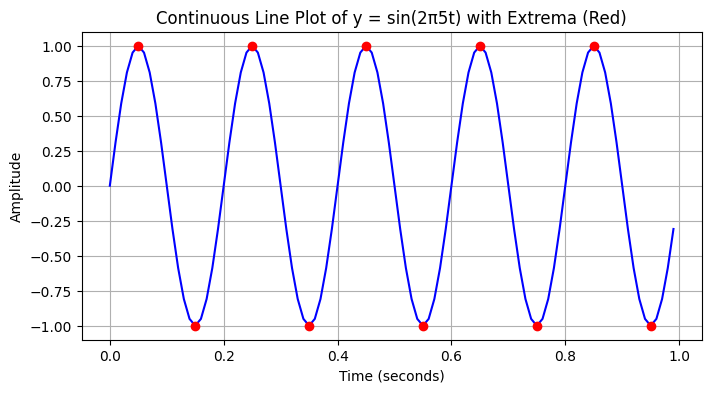

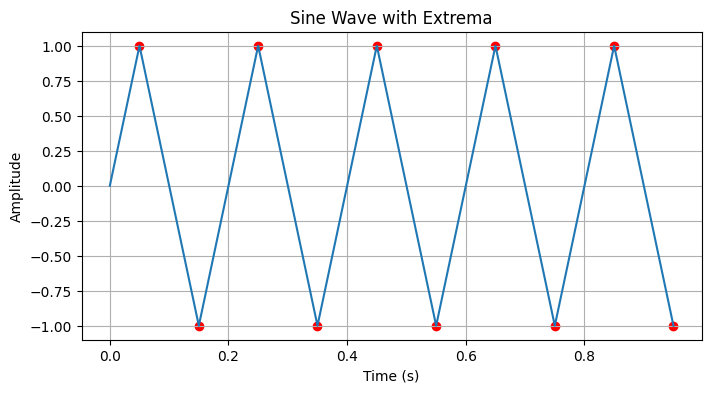

In [13]:
#calling matplotlib and numpy
import numpy as np
import matplotlib.pyplot as plt

#recieving info into function in a form on numpy array 
#in this one the frequency = 5 hz and sampling time is 0.01 sec
#if i use array i need to set time range for sampling
t = np.arange(0, 1, 0.01)
# Parameters
frequency = 5        # Frequency in Hertz
sampling_rate = 0.01   # Samples per second
duration = 1          # Duration in seconds of all the sinus graph

# Generate the sine wave based on time array created before
y = np.sin(2 * np.pi * 5 * t)
#this is the normal equation for sinus: y(t)=sin(2πft)
#np.pi*2 = 2 pi = 360 degrees
#sin = sin
#frequency = how much cycles in 1 sec
#t = time base = how much time and how much sampling -
# יצירת גרף
# Find extrema (maxima and minima)
extrema_indices = np.where(np.diff(np.sign(np.diff(y))) != 0)[0] + 1
extrema_x = t[extrema_indices]
extrema_y = y[extrema_indices]

# Create plot for the sine wave as a continuous line
plt.figure(figsize=(8, 4))
plt.plot(t, y, color='blue', label='Sine Wave')  # Continuous line plot
plt.scatter(extrema_x, extrema_y, color='red', label='Extrema', zorder=5)  # Red points on extrema

# Labeling the plot
plt.title("Continuous Line Plot of y = sin(2π5t) with Extrema (Red)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)

'''
i created an array and multiply it by 360 degrees and frequency,
so every sample_size i set, it will check when in time fits the
cycle of sinus according to the frequency and draw a dot
arr = np.array([1, 2, 3, 4])
print(arr * 2)  # Output: [2 4 6 8]
'''
dy_dt = np.diff(y) / np.diff(t)  # נגזרת לפי הפרש
t_derivative = t[:-1]  # טווח זמן לנגזרת (ללא הערך האחרון)

# מציאת נקודות שבהן הנגזרת משנה סימן
zero_derivative_indices = []
for i in range(len(dy_dt) - 1):
    if dy_dt[i] > 0 and dy_dt[i + 1] < 0:  # שינוי מעלה למטה -> מקסימום
        zero_derivative_indices.append(i + 1)  # שמירה של האינדקס הבא
    elif dy_dt[i] < 0 and dy_dt[i + 1] > 0:  # שינוי למטה למעלה -> מינימום
        zero_derivative_indices.append(i + 1)

time = np.arange(0, 1, 0.01*5)
y_axis = np.sin(2 * np.pi * frequency * time)

# המרת אינדקסים לזמנים וערכים
zero_derivative_times = t[zero_derivative_indices]
zero_derivative_values = y[zero_derivative_indices]

# יצירת גרף
plt.figure(figsize=(8, 4))
plt.plot(time, y_axis, label="Sine Wave")  # גרף הסינוס
plt.scatter(zero_derivative_times, zero_derivative_values, color='red', label="Extrema")  # נקודות מקסימום ומינימום
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sine Wave with Extrema')
plt.grid()
plt.show()

PART 2 OF MINI_PROJECT_1

QUESTION 2.1

<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
C:\Users\amits\AppData\Local\Temp\ipykernel_29592\2423824810.py:5: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv('C:\python advenced\my-reposatory\mini project 1\laptop_price_dataset.csv')


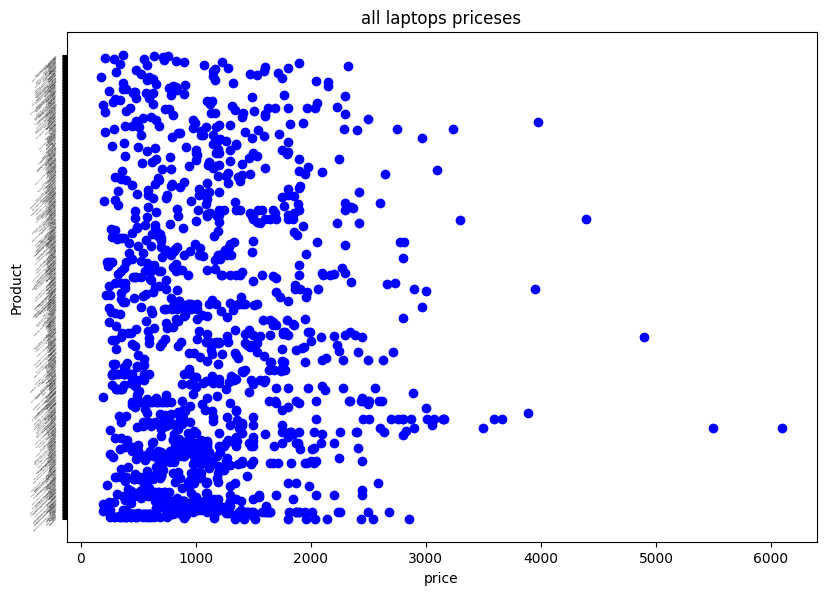

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:\python advenced\my-reposatory\mini project 1\laptop_price_dataset.csv')

# יצירת גרף פיזור (Scatter Plot)
plt.figure(figsize=(10, 6))  # קביעת גודל הגרף
plt.scatter(df['Price (Euro)'], df['Product'], color='blue')

# הגדרת כותרות לצירים ולגרף
plt.xlabel('price')
plt.ylabel('Product')
plt.title('all laptops priceses')

# הצגת הגרף
plt.yticks(rotation=45, fontsize=0.01)
plt.tight_layout()  # הוספת רווחים למניעת חפיפות
plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.1)
plt.show()

QUESTION 2.2

<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
C:\Users\amits\AppData\Local\Temp\ipykernel_29592\1698078041.py:5: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv('C:\python advenced\my-reposatory\mini project 1\laptop_price_dataset.csv')


{'Apple': 1564, 'HP': 1080, 'Acer': 633, 'Asus': 1124, 'Dell': 1199, 'Lenovo': 1094, 'Chuwi': 314, 'MSI': 1729, 'Microsoft': 1612, 'Toshiba': 1268, 'Huawei': 1424, 'Xiaomi': 1133, 'Vero': 217, 'Razer': 3346, 'Mediacom': 295, 'Samsung': 1413, 'Google': 1678, 'Fujitsu': 729, 'LG': 2099}


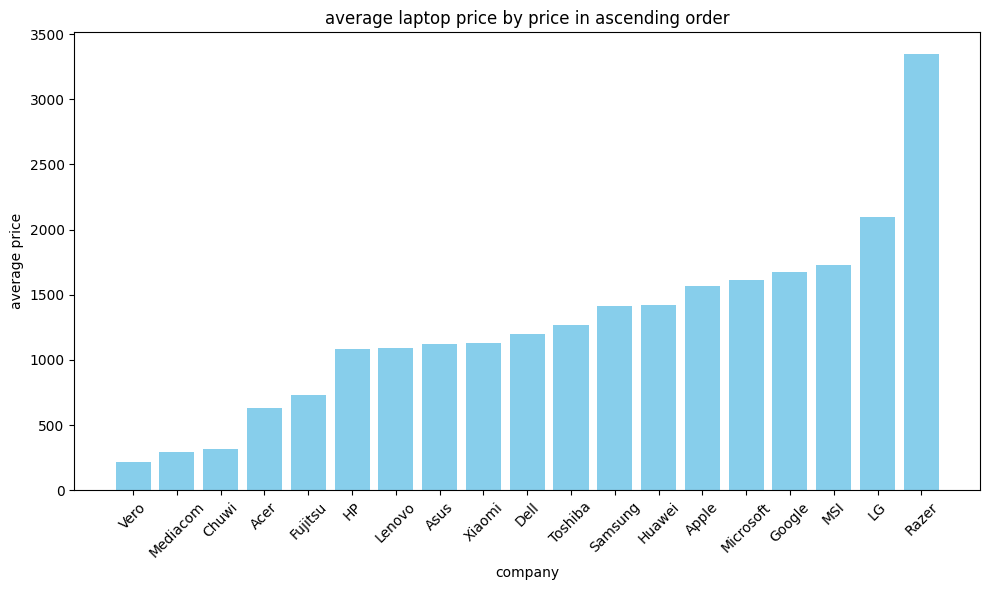

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:\python advenced\my-reposatory\mini project 1\laptop_price_dataset.csv')

companies_prices = {}

# לולאת חיפוש לפי שם חברה
for index, row in df.iterrows():
    company_name = row['Company']
    price = row['Price (Euro)']
    
    if company_name not in companies_prices:
        companies_prices[company_name] = []  # יצירת רשימה חדשה אם החברה לא קיימת במילון
    
    companies_prices[company_name].append(price)  # הוספת המחיר לרשימה המתאימה

# חישוב ממוצע של כל מחירים עבור כל חברה והפיכת התוצאה לאחוז שלם
for company in companies_prices:
    average_price = sum(companies_prices[company]) / len(companies_prices[company])
    companies_prices[company] = round(average_price)  # עיגול למספר שלם

# הדפסת המילון עם ממוצעים
print(companies_prices)

# מיון המילון לפי המחיר (ממוצע) בסדר עולה
sorted_companies_prices = dict(sorted(companies_prices.items(), key=lambda item: item[1]))

# יצירת היסטוגרמה
plt.figure(figsize=(10, 6))  # קביעת גודל הגרף
plt.bar(sorted_companies_prices.keys(), sorted_companies_prices.values(), color='skyblue')

# הגדרת כותרות לצירים ולגרף
plt.xlabel('company')
plt.ylabel('average price')
plt.title('average laptop price by price in ascending order')

# הצגת הגרף
plt.xticks(rotation=45)  # סיבוב שמות החברות למניעת חפיפות
plt.tight_layout()  # הוספת רווחים למניעת חפיפות
plt.show()

QUESTION 2.3

<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
C:\Users\amits\AppData\Local\Temp\ipykernel_29592\1023096600.py:5: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv('C:\python advenced\my-reposatory\mini project 1\laptop_price_dataset.csv')


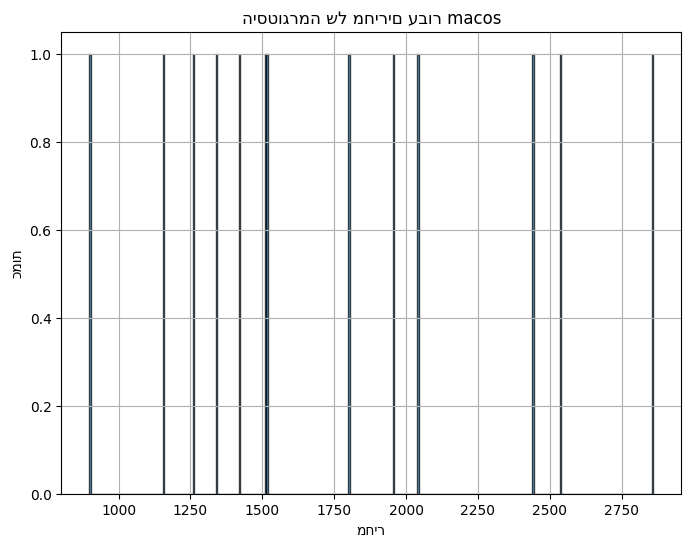

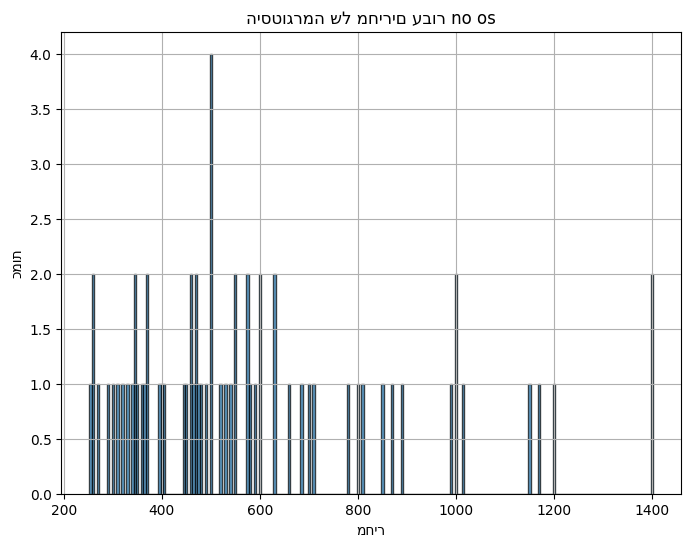

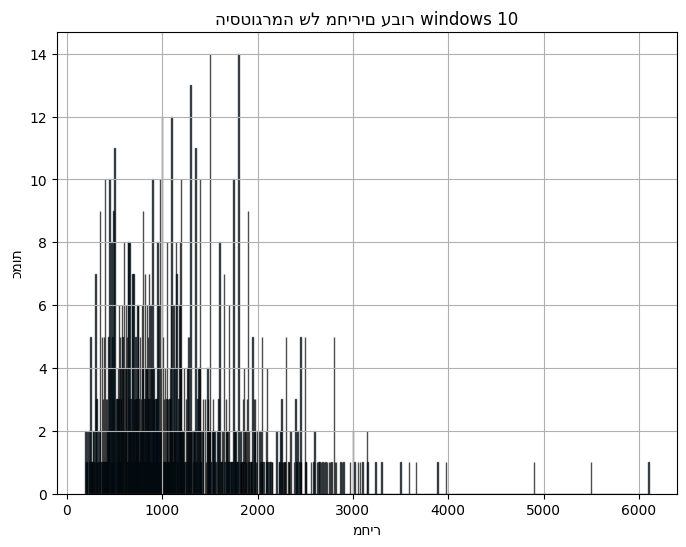

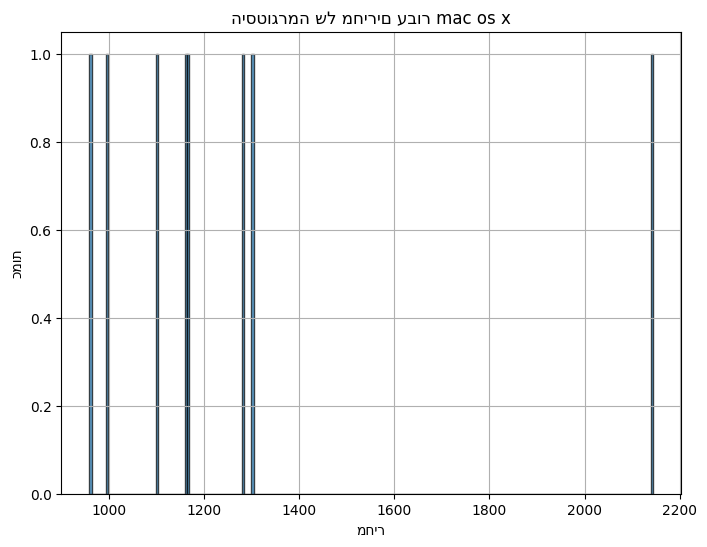

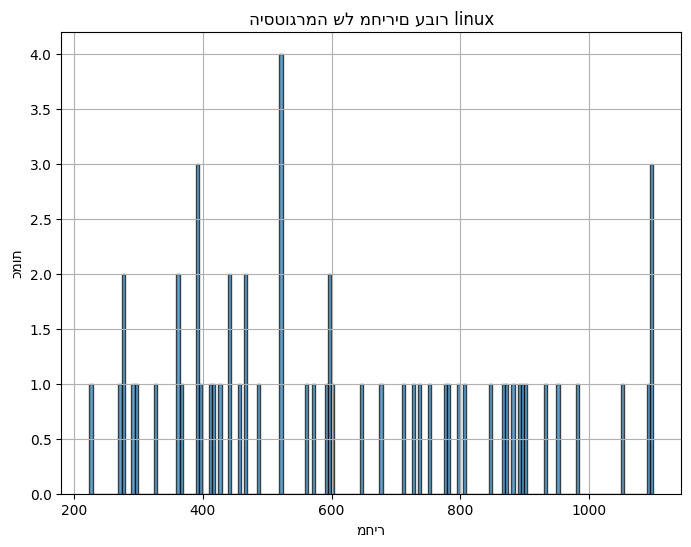

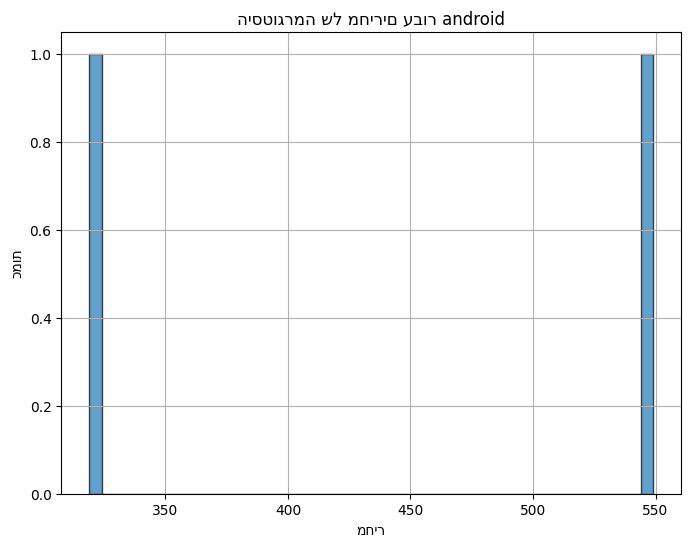

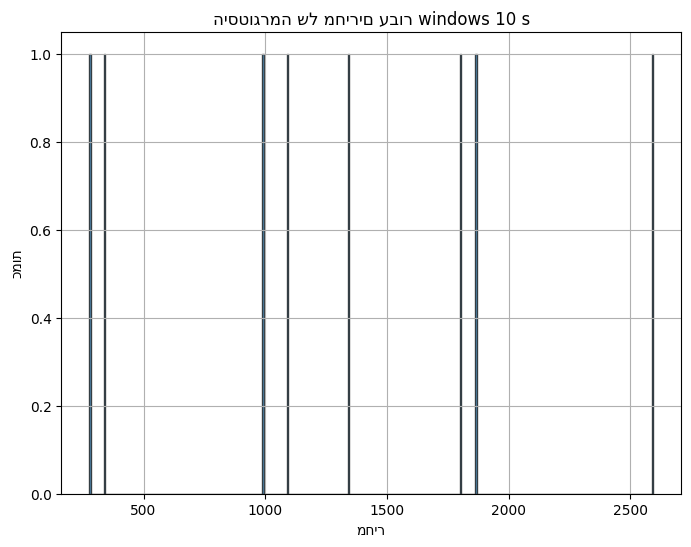

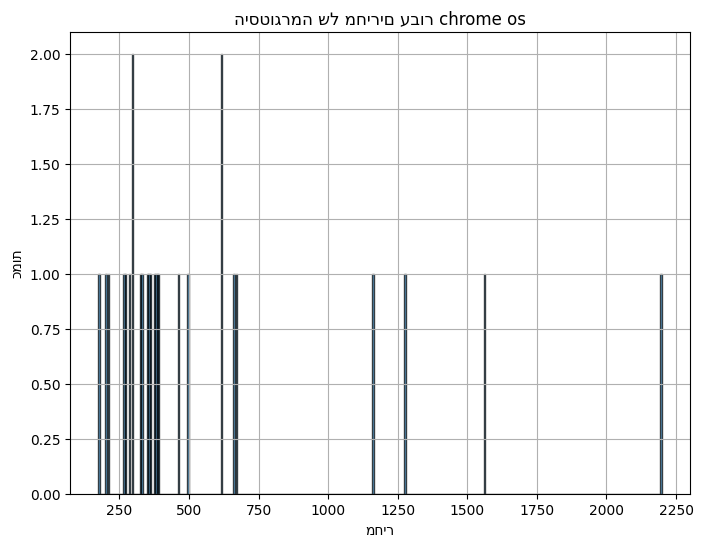

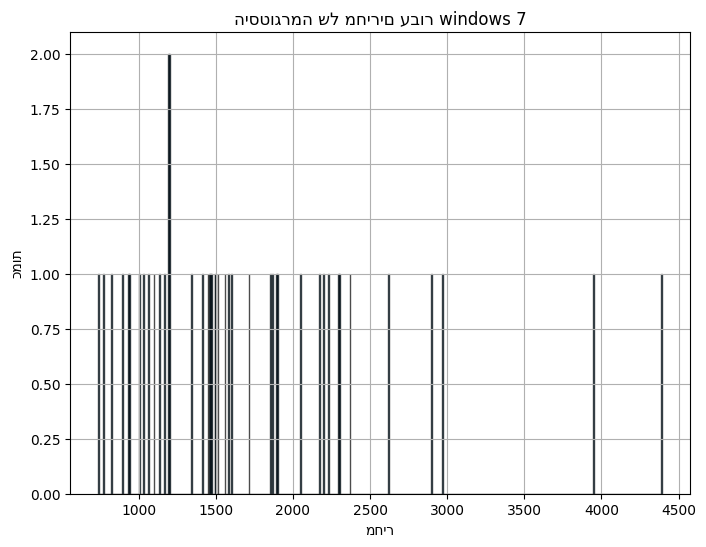

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:\python advenced\my-reposatory\mini project 1\laptop_price_dataset.csv')

df['OpSys'] = df['OpSys'].str.lower().str.strip()
opsys_prices = {}

for index, row in df.iterrows():
    opsys = row['OpSys']
    price = row['Price (Euro)']
    
    if opsys not in opsys_prices:
        opsys_prices[opsys] = []  # יצירת רשימה חדשה אם החברה לא קיימת במילון

    opsys_prices[opsys].append(price)  # הוספת המחיר לרשימה המתאימה

# יצירת היסטוגרמה עבור כל חברה במילון
for opsys, price in opsys_prices.items():
    plt.figure(figsize=(8, 6))  # גודל הגרף
    plt.hist(price, bins=np.arange(min(price), max(price) + 5, 5), edgecolor='black', alpha=0.7)

    # הגדרת כותרות ותגים לצירים
    plt.title(f'היסטוגרמה של מחירים עבור {opsys}')
    plt.xlabel('מחיר')
    plt.ylabel('כמות')

    # הצגת הגרף
    plt.grid(True)
    plt.show()

QUESTION 2.4

<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
C:\Users\amits\AppData\Local\Temp\ipykernel_29592\1682854353.py:5: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv('C:\python advenced\my-reposatory\mini project 1\laptop_price_dataset.csv')


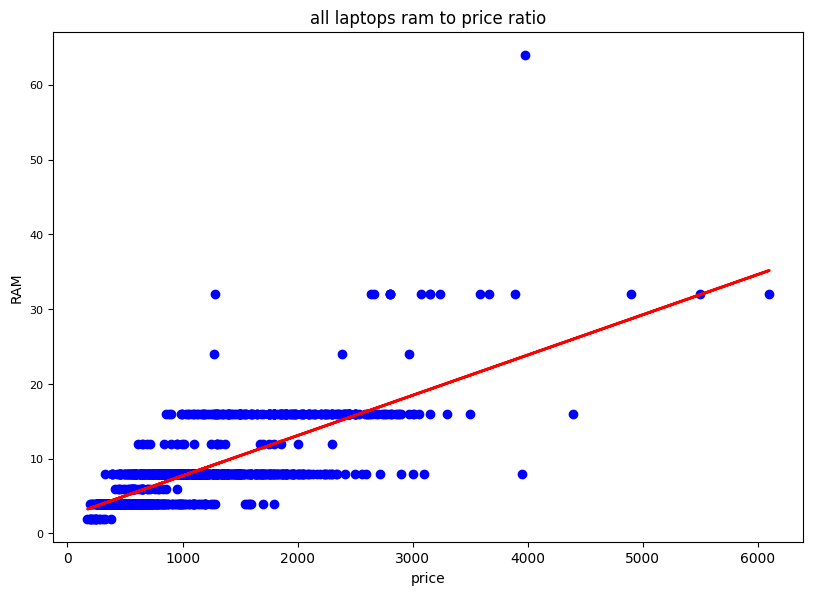

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:\python advenced\my-reposatory\mini project 1\laptop_price_dataset.csv')

plt.figure(figsize=(10, 6))  # קביעת גודל הגרף
plt.scatter(df['Price (Euro)'], df['RAM (GB)'], color='blue')

# חישוב קו מגמה לינארי (שיפוע ומח intercept)
slope, intercept = np.polyfit(df['Price (Euro)'], df['RAM (GB)'], 1)

# יצירת קו מגמה מהשיפוע וה-intercept
line = slope * df['Price (Euro)'] + intercept

# הוספת קו מגמה לגרף
plt.plot(df['Price (Euro)'], line, color='red', linewidth=2, label='trend line')

# הגדרת כותרות לצירים ולגרף
plt.xlabel('price')
plt.ylabel('RAM')
plt.title('all laptops ram to price ratio')

# הצגת הגרף
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()  # הוספת רווחים למניעת חפיפות
plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.1)
plt.show()

QUESTION 2.5

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:\python advenced\my-reposatory\mini project 1\laptop_price_dataset.csv')

list1 = ['Empty']

# לולאת חיפוש
for index, row in df.iterrows():
    data = str(row['Memory'])

    if 'HDD' in data:
        pass
    elif 'SSD' in data:
        pass
    elif 'Flash Storage' in data:
        pass
    elif 'Hybrid' in data:
        pass
    elif 'SSD +   HDD' in data:
        pass
    else:
        list1.append(data)

#print(list1)

list2 = ['empty']
df["Storage type"] = df["Memory"].str.replace(r'\b\d+(GB|TB)\b', '', regex=True).str.strip()

list2 = ['empty']

# לולאת חיפוש
for index, row in df.iterrows():
    data = str(row['Memory'])

    if 'SSD +  HDD' in data:
        pass
    elif 'HDD' in data:
        pass
    elif 'SSD' in data:
        pass
    elif 'Flash Storage' in data:
        pass
    elif 'Hybrid' in data:
        pass
    else:
        list1.append(data)
#print(list2)

print(df["Storage type"])

0                 SSD
1       Flash Storage
2                 SSD
3                 SSD
4                 SSD
            ...      
1270              SSD
1271              SSD
1272    Flash Storage
1273              HDD
1274              HDD
Name: Storage type, Length: 1275, dtype: object


<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
C:\Users\amits\AppData\Local\Temp\ipykernel_29592\467369604.py:5: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv('C:\python advenced\my-reposatory\mini project 1\laptop_price_dataset.csv')
